# Mineração de Dados

Conjunto de dados: 
Diamonds Prices

https://www.kaggle.com/datasets/nancyalaswad90/diamonds-prices

Marcos Geraldo Braga Emiliano
19.1.4012


# Introdução


A mineração de dados tem aplicações diversas, normalmente se visando extrair conhecimento de conjuntos de dados que a princípio não tem uma regra bem definida que os descreva, buscando se resolver uma tarefa de classificação ou regressão.

Neste contexto, foram utilizadas técnicas de mineração de dados para resolver um problema de regressão, que se tratava de inferir o valor de diamantes por meio de um conjunto de nove atributos: carat (quilate), cut (lapidação), color (cor), clarity (translucidez), depth(altura), table (diametro), x, y, e z, onde se utilizando destes atributos físicos da pedra era desejado inferir um preço. 

Onde o resultado do deste projeto pode ser utilizada para precificar de forma automática diamentes e por meio disso buscar erros ou possíveis fraudes.


# Fundamentação Teórica

Foi utilizado durante todo o projeto os conceitos e técnicas discutidas em aula, desde os métodos de se tratar os dados, os modelos utilizados, as práticas abordadas

# Trabalhos Relacionados

Foram utilizados três trabalhos relacionados que tratavam deste problema, o Diamond Prices Prediction with 99% accuracy, feito pelo usuário PREETI MADAN, Random Forest Diamond Price Prediction, feito pelo usuário ABDU0CH, e DiramondPrices_RegressionModels, feito pelo usuário MAHYAR ARANI, as principais contribuições destes trabalhos vem de auxílios de sintaxe da linguagem, onde existe operações que são facilitadas por funções e comandos. 

A contribuição mais marcante veio do trabalho Diamond Prices Prediction with 99% accuracy, com uma estratégia de aplicar uma função invertível no atributo alvo visando diminuir a variação dos dados, desta forma auxiliando o modelo a funcionar melhor para todos os conjuntos de valores. 

# Desenvolvimento

Falando primeiramente dos dados, temos 53,940 instancias no banco de dados, onde todas ele tem os seguintes atributos, o quilate, uma medida continua do peso da pedra, o corte, um valor categórico nominal da qualidade da lapidação da pedra, a cor, outra variável categórico nominal que representa qual a cor da pedra, a profundidade, um valor continuo que representa a altura da pedra, a “mesa”, uma medida continua do diâmetro da pedra, o preço, representado como um valor continuo e as dimensões x, y e z da pedra, todas elas continuas.



## Contexto geral dos dados: Dados relativos a 53,940 diamantes de corte redondo negociados em 2022, onde são descritas 10 caracteristicas sobre eles, carat, cut, color, clarity, depth, table, price, x, y, e z, descrição detalhada a frente. 

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import math
import pylab as plt
import seaborn as sns
from scipy import stats
from pandas.api.types import is_string_dtype 
from pandas.api.types import is_numeric_dtype
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline


Mounted at /content/drive


In [2]:
data = pd.read_csv('/content/drive/My Drive/TPDataMining/DiamondsPrices2022.csv')

data.shape

(53943, 11)

Removendo o atributo Indice

In [3]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
numData = data.select_dtypes('number')
catData = data.select_dtypes('O')
for c in catData.columns:
    print(catData[c].unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [5]:
instances, features = data.shape

In [6]:
data.head(20)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


# Descrição dos Atributos:

## 1) index - indice numerico que indentifica a entidade, dado Discreto

## 2) carat - quilate, unidade de medida baseada no peso, dado Continuo 

## 3) cut - classificação do corte da pedra preciosa, dado categorico

## 4) color - cor da pedra, dado categorico

## 5) clarity - clareza da pedra, dado categorico

## 6) depth - "altura" da pedra, continuo

## 7) table - "largura" do topo da pedra, continuo

## 8) price - preço da pedra em dolar, continuo

## 9) x - medida no eixo x da pedra em mm, continuo

## 10) y - medida no eixo y da pedra em mm, continuo

## 11) z - medida no eixo z da pedra em mm, continuo

## Avaliando os valores contidos no banco de dados:

### Quilate

In [7]:
min = np.min(data['carat'])
max = np.max(data['carat'])
media = sum(data['carat'])/instances
desv= math.sqrt(np.sum((data['carat']-media)**2)/instances)
inter=max-min
out=[]

print("Carat:")
print("Minimo: ",min)
print("Maximo: ",max)
print("Media: ",media)
print("Desvio Padrao: ", desv)
print("Intervalo: ", inter)

Carat:
Minimo:  0.2
Maximo:  5.01
Media:  0.7979346717831621
Desvio Padrao:  0.4739941595630074
Intervalo:  4.81


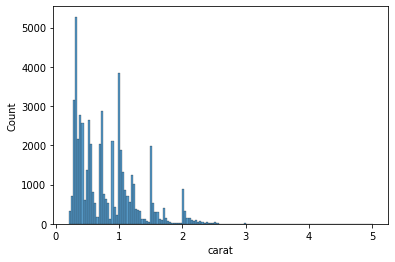

In [8]:
sns.histplot(numData['carat'].sort_values())

### "Altura"

In [9]:
min = np.min(data['depth'])
max = np.max(data['depth'])
media = sum(data['depth'])/instances
desv= math.sqrt(np.sum((data['depth']-media)**2)/instances)
inter=max-min
out=[]

print("Depth:")
print("Minimo: ",min)
print("Maximo: ",max)
print("Media: ",media)
print("Desvio Padrao: ", desv)
print("Intervalo: ", inter)

Depth:
Minimo:  43.0
Maximo:  79.0
Media:  61.74932243293768
Desvio Padrao:  1.4326129869036368
Intervalo:  36.0


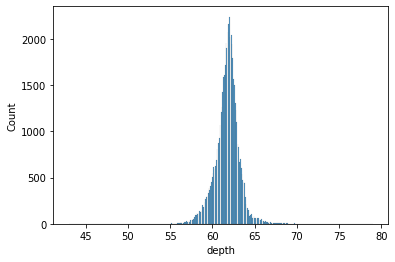

In [10]:
sns.histplot(numData['depth'].sort_values())

### "Largura"

In [11]:
min = np.min(data['table'])
max = np.max(data['table'])
media = sum(data['table'])/instances
desv= math.sqrt(np.sum((data['table']-media)**2)/instances)
inter=max-min
out=[]

print("Table:")
print("Minimo: ",min)
print("Maximo: ",max)
print("Media: ",media)
print("Desvio Padrao: ", desv)
print("Intervalo: ", inter)

Table:
Minimo:  43.0
Maximo:  95.0
Media:  57.45725117253402
Desvio Padrao:  2.2345282410474523
Intervalo:  52.0


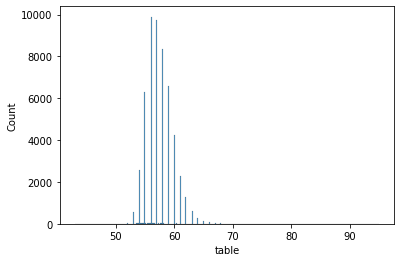

In [12]:
sns.histplot(numData['table'].sort_values())

### "Preço"

In [13]:
min = np.min(data['price'])
max = np.max(data['price'])
media = sum(data['price'])/instances
desv= math.sqrt(np.sum((data['price']-media)**2)/instances)
inter=max-min
out=[]

print("Price:")
print("Minimo: ",min)
print("Maximo: ",max)
print("Media: ",media)
print("Desvio Padrao: ", desv)
print("Intervalo: ", inter)

Price:
Minimo:  326
Maximo:  18823
Media:  3932.734293606214
Desvio Padrao:  3989.301469302266
Intervalo:  18497


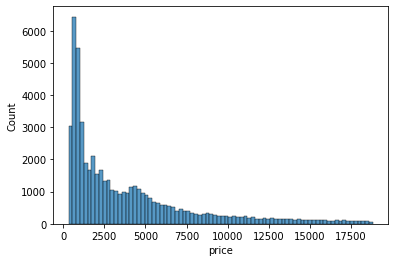

In [14]:
sns.histplot(numData['price'].sort_values())

### Medidas x, y e z

In [15]:
min = np.min(data['x'])
max = np.max(data['x'])
media = sum(data['x'])/instances
desv= math.sqrt(np.sum((data['x']-media)**2)/instances)
inter=max-min
out=[]

print("\nEixo x:")
print("Minimo: ",min)
print("Maximo: ",max)
print("Media: ",media)
print("Desvio Padrao: ", desv)
print("Intervalo: ", inter)

min = np.min(data['y'])
max = np.max(data['y'])
media = sum(data['y'])/instances
desv= math.sqrt(np.sum((data['y']-media)**2)/instances)
inter=max-min
out=[]

print("\n--------------------\n")

print("Eixo y:")
print("Minimo: ",min)
print("Maximo: ",max)
print("Media: ",media)
print("Desvio Padrao: ", desv)
print("Intervalo: ", inter)

print("\n--------------------\n")


min = np.min(data['z'])
max = np.max(data['z'])
media = sum(data['z'])/instances
desv= math.sqrt(np.sum((data['z']-media)**2)/instances)
inter=max-min
out=[]

print("Eixo z:")
print("Minimo: ",min)
print("Maximo: ",max)
print("Media: ",media)
print("Desvio Padrao: ", desv)
print("Intervalo: ", inter)



Eixo x:
Minimo:  0.0
Maximo:  10.74
Media:  5.731158074263461
Desvio Padrao:  1.121719188381892
Intervalo:  10.74

--------------------

Eixo y:
Minimo:  0.0
Maximo:  58.9
Media:  5.734526444580299
Desvio Padrao:  1.1420923330316735
Intervalo:  58.9

--------------------

Eixo z:
Minimo:  0.0
Maximo:  31.8
Media:  3.5387295849324203
Desvio Padrao:  0.7056729303858117
Intervalo:  31.8


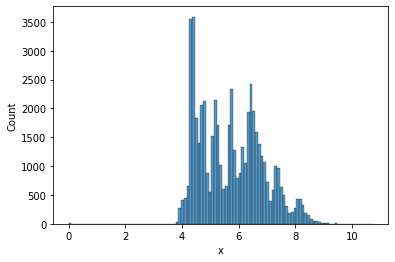

In [16]:
sns.histplot(numData['x'].sort_values())

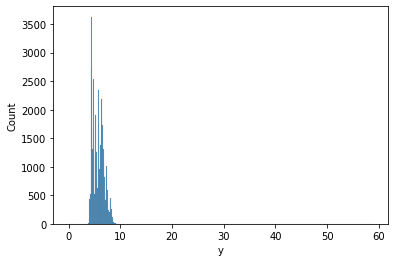

In [17]:
sns.histplot(numData['y'].sort_values())

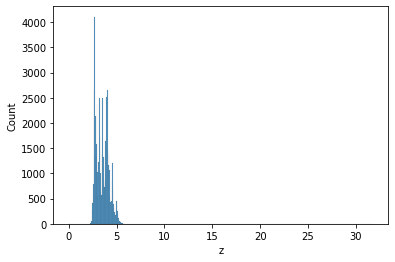

In [18]:
sns.histplot(numData['z'].sort_values())

### Qualidade do Corte

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


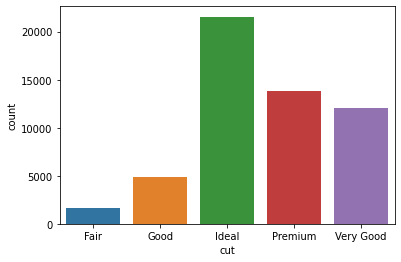

In [19]:
sns.countplot(catData['cut'].sort_values())

### Cor

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


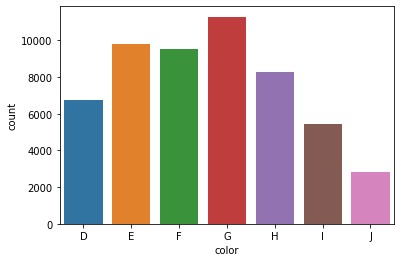

In [20]:
sns.countplot(catData['color'].sort_values())

### Clareza

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


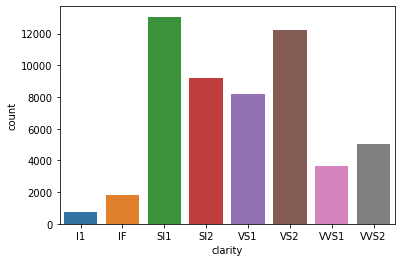

In [21]:
sns.countplot(catData['clarity'].sort_values())

# Limpeza de Dados

Na etapa de tratamento dos dados, não foi encontrado nenhuma instancia que tenha um resultado nulo para algum atributo, foram encontrados 149 valores repetidos, porem como a base da dados é bem extensa isso não é um problema, foi realizada uma busca por Outliers, e foi contatado a existência de alguns, desta forma foi utilizado o cálculo do Z Score para remover esses dados que não se enquadravam no esperado, como a base de dados é extensa não há problemas de remover os dados.

Os atributos categóricos foram tratados se utilizando do one hot encoder, foi realizada uma discretização dos dados contínuos, ocorreram testes sem se utilizar tal técnica, mas seu uso se fez valido.


In [22]:
print(data.isnull().any())
print()

carat      False
cut        False
color      False
clarity    False
depth      False
table      False
price      False
x          False
y          False
z          False
dtype: bool



In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  object 
 2   color    53943 non-null  object 
 3   clarity  53943 non-null  object 
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   price    53943 non-null  int64  
 7   x        53943 non-null  float64
 8   y        53943 non-null  float64
 9   z        53943 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


### Nenhum valor nulo encontrado

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  object 
 2   color    53943 non-null  object 
 3   clarity  53943 non-null  object 
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   price    53943 non-null  int64  
 7   x        53943 non-null  float64
 8   y        53943 non-null  float64
 9   z        53943 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


### Buscando valores duplicados 

In [25]:
print(f'The number of duplicate rows : {data.duplicated().sum()}') 

The number of duplicate rows : 149


### Buscando Outliers 

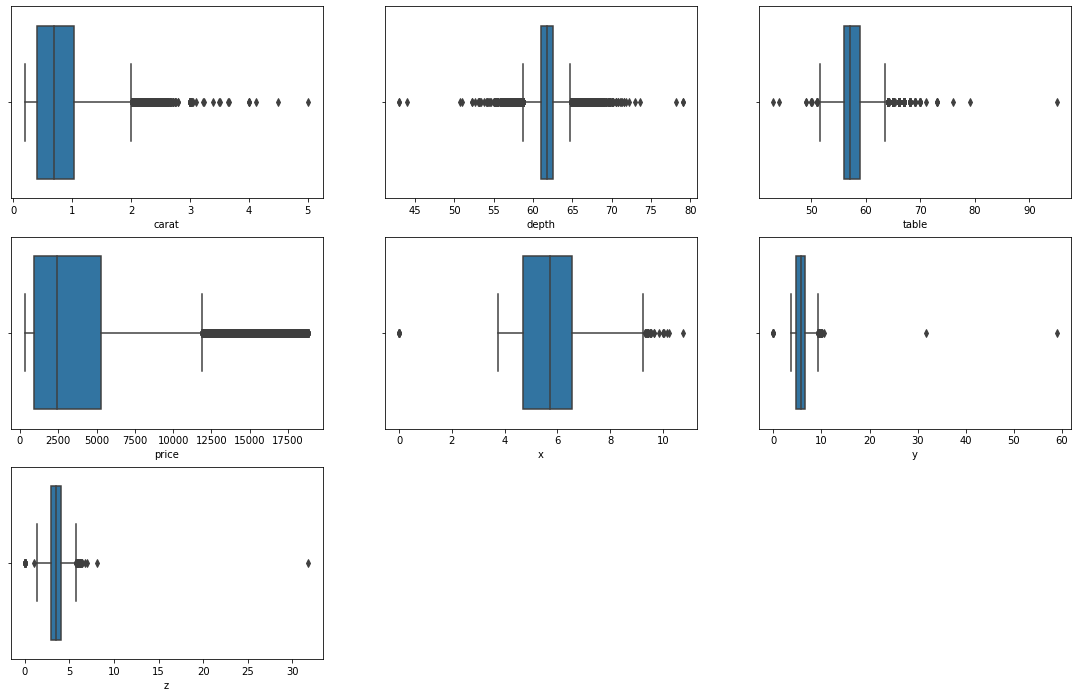

In [26]:
i = 1
plt.figure(figsize=(19, 12))
for c in numData.columns:
    plt.subplot(3, 3, i)
    sns.boxplot(x=data[c])
    i+=1

### Fazendo o tratamento dos Outliers 

In [27]:
data = data[(np.abs(stats.zscore(numData)) < 3).all(axis=1)] # Removendo os valores que não se enquadram

In [28]:
y=data['price'] #Dependent variable


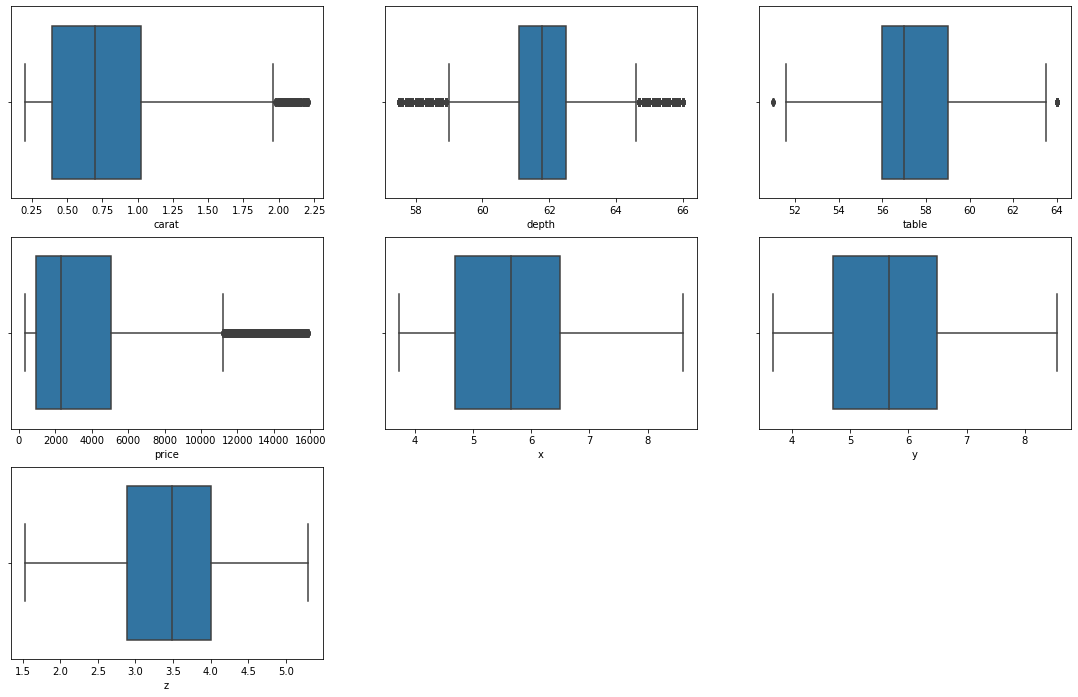

In [29]:
numData = data.select_dtypes('number')
i = 1
plt.figure(figsize=(19, 12))
for c in numData.columns:
    plt.subplot(3, 3, i)
    sns.boxplot(x=data[c])
    i+=1

### Correlação dos demais atributos com o preço

In [30]:
data.corrwith(data.price)

carat    0.922409
depth   -0.001882
table    0.131667
price    1.000000
x        0.890451
y        0.891716
z        0.887339
dtype: float64

### Distribuição de valores

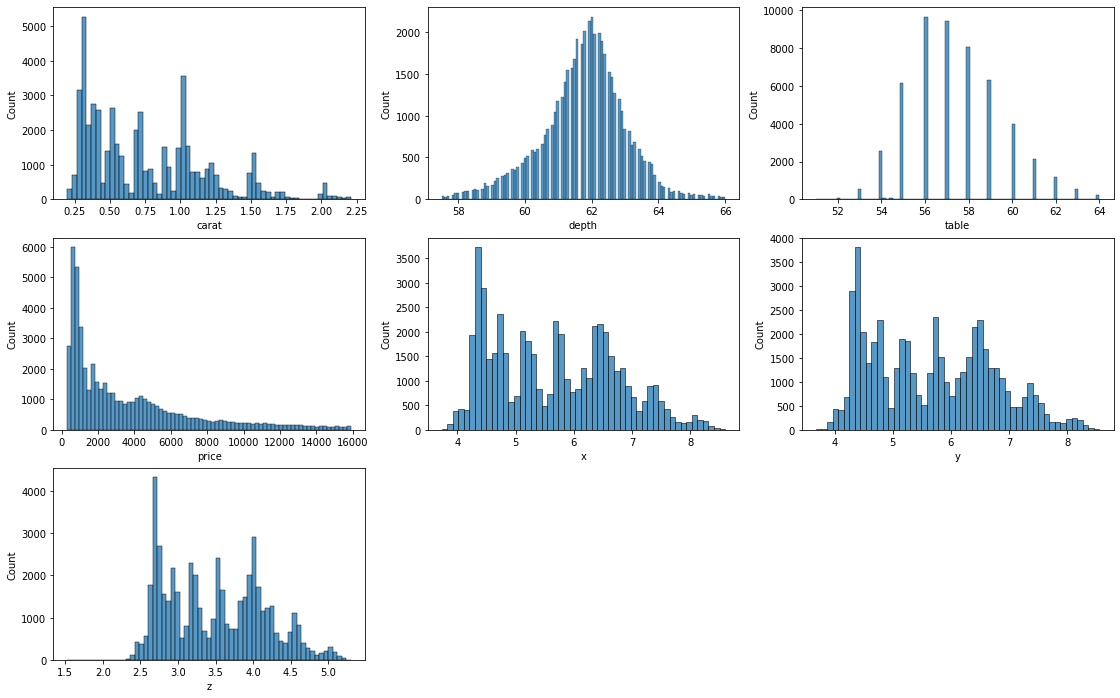

In [31]:
numData = data.select_dtypes('number')
i = 1
plt.figure(figsize=(19, 12))
for c in numData.columns:
    plt.subplot(3, 3, i)
    sns.histplot(x = data[c])
    i+=1

### Fazendo o tratamento dos atributos categoricos

In [32]:
data['cut'] = data['cut'].map({'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4})
data['color'] = data['color'].map({'J':0, 'I':1, 'H':2, 'G':3, 'F':4, 'E':5, 'D':6})
data['clarity'] = data['clarity'].map({'I1':0, 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':7})

### Resultado das operações 

In [33]:
imprimir=True

In [34]:
data.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,51593.000000,51593.000000,51593.000000,51593.000000,51593.000000,51593.000000,51593.000000,51593.000000,51593.000000,51593.000000
mean,0.759929,2.952532,3.433625,3.086950,61.752751,57.369213,3585.983602,5.657861,5.661277,3.494647
std,0.424971,1.070644,1.694679,1.642551,1.269271,2.100094,3436.780058,1.057390,1.050352,0.653032
min,0.200000,0.000000,0.000000,0.000000,57.500000,51.000000,326.000000,3.730000,3.680000,1.530000
25%,0.390000,2.000000,2.000000,2.000000,61.100000,56.000000,926.000000,4.690000,4.700000,2.890000
50%,0.700000,3.000000,3.000000,3.000000,61.800000,57.000000,2304.000000,5.660000,5.660000,3.490000
75%,1.020000,4.000000,5.000000,4.000000,62.500000,59.000000,5047.000000,6.490000,6.490000,4.010000
max,2.210000,4.000000,6.000000,7.000000,66.000000,64.000000,15898.000000,8.600000,8.550000,5.300000


In [35]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75
5,0.24,2,0,5,62.8,57.0,336,3.94,3.96,2.48


In [36]:
if(imprimir):
  print(data.sort_values('carat', ascending=False).head(5)['carat'])
  print(data.sort_values('carat', ascending=True).head(5)['carat'])

25250    2.21
24072    2.21
24922    2.21
26321    2.21
25506    2.21
Name: carat, dtype: float64
31598    0.2
31591    0.2
31592    0.2
31593    0.2
31594    0.2
Name: carat, dtype: float64


In [37]:
if(imprimir):
  print(data.sort_values('depth', ascending=False).head(5)['depth'])
  print(data.sort_values('depth', ascending=True).head(5)['depth'])

2534     66.0
1523     66.0
46742    66.0
15331    66.0
1097     66.0
Name: depth, dtype: float64
5481     57.5
50486    57.5
11639    57.5
34938    57.5
50211    57.5
Name: depth, dtype: float64


In [38]:
if(imprimir):
  print(data.sort_values('table', ascending=False).head(5)['table'])
  print(data.sort_values('table', ascending=True).head(5)['table'])

4582     64.0
10570    64.0
20481    64.0
24787    64.0
3595     64.0
Name: table, dtype: float64
46040    51.0
47630    51.0
33586    51.0
3979     51.0
45798    51.0
Name: table, dtype: float64


In [39]:
if(imprimir):
  print(data.sort_values('price', ascending=False).head(5)['price'])
  print(data.sort_values('price', ascending=True).head(5)['price'])

26393    15898
26392    15897
26391    15897
26390    15897
26389    15889
Name: price, dtype: int64
0    326
1    326
3    334
4    335
5    336
Name: price, dtype: int64


In [40]:
if(imprimir):
  print(data.sort_values('x', ascending=False).head(5)['x'])
  print(data.sort_values('x', ascending=True).head(5)['x'])

24739    8.60
22140    8.57
25562    8.57
25749    8.54
23121    8.52
Name: x, dtype: float64
31596    3.73
31600    3.73
31598    3.74
31599    3.76
31601    3.77
Name: x, dtype: float64


In [41]:
if(imprimir):
  print(data.sort_values('y', ascending=False).head(5)['y'])
  print(data.sort_values('y', ascending=True).head(5)['y'])

26242    8.55
24739    8.53
25717    8.53
22140    8.53
26223    8.51
Name: y, dtype: float64
31600    3.68
31598    3.71
31596    3.71
31601    3.72
31599    3.73
Name: y, dtype: float64


In [42]:
if(imprimir):
  print(data.sort_values('z', ascending=False).head(5)['z'])
  print(data.sort_values('z', ascending=True).head(5)['z'])

23194    5.30
23690    5.23
13118    5.23
25305    5.23
23513    5.23
Name: z, dtype: float64
20694    1.53
39246    2.06
31592    2.24
47138    2.25
31591    2.26
Name: z, dtype: float64


### Tratamento dos dados continuos para intervalos

In [43]:
Discretizacao=True
bins=1000
imprimir=True
Normalizacao=False
LogApply=False
LogPrice=True

In [44]:
#y=data['price'] #Dependent variable


Separação dos dados em treino e teste

### Carat

In [45]:
if(Discretizacao):
  min = np.min(data['carat'])
  max = np.max(data['carat'])
  inter=max-min
  print("\nIntervalo dos Valores:",inter)
  gaps=inter/bins
  print("\nTamanho das Bins:",gaps)
  data['carat'] = data['carat'] //gaps
  if(imprimir):
    print("\n",(data.sort_values('carat', ascending=True).head(10)['carat']))
    print("\n",(data.sort_values('carat', ascending=False).head(10)['carat']))


Intervalo dos Valores: 2.01

Tamanho das Bins: 0.0020099999999999996

 31598    99.0
31591    99.0
31592    99.0
31593    99.0
31594    99.0
31595    99.0
31596    99.0
31597    99.0
31599    99.0
31600    99.0
Name: carat, dtype: float64

 25250    1099.0
24072    1099.0
24922    1099.0
26321    1099.0
25506    1099.0
25106    1099.0
25306    1099.0
24153    1099.0
25330    1099.0
25089    1099.0
Name: carat, dtype: float64


Depth

In [46]:
if(Discretizacao):
    min = np.min(data['depth'])
    max = np.max(data['depth'])
    inter=max-min
    print("\nIntervalo dos Valores:",inter)
    gaps=inter/bins
    print("\nTamanho das Bins:",gaps)
    data['depth'] = data['depth'] //gaps
    if(imprimir):
      print("\n",(data.sort_values('depth', ascending=True).head(10)['depth']))
      print("\n",(data.sort_values('depth', ascending=False).head(10)['depth']))


Intervalo dos Valores: 8.5

Tamanho das Bins: 0.0085

 5481     6764.0
50486    6764.0
11639    6764.0
34938    6764.0
50211    6764.0
34024    6764.0
46085    6764.0
25562    6764.0
12641    6764.0
12692    6764.0
Name: depth, dtype: float64

 2534     7764.0
1523     7764.0
46742    7764.0
15331    7764.0
1097     7764.0
15139    7764.0
17716    7764.0
49151    7764.0
49328    7764.0
3115     7764.0
Name: depth, dtype: float64


### Table

In [47]:
if(Discretizacao):
    min = np.min(data['table'])
    max = np.max(data['table'])
    inter=max-min
    print("\nIntervalo dos Valores:",inter)
    gaps=inter/bins
    print("\nTamanho das Bins:",gaps)
    data['table'] = data['table'] //gaps
    if(imprimir):
      print("\n",(data.sort_values('table', ascending=True).head(10)['table']))
      print("\n",(data.sort_values('table', ascending=False).head(10)['table']))


Intervalo dos Valores: 13.0

Tamanho das Bins: 0.013

 46040    3923.0
47630    3923.0
33586    3923.0
3979     3923.0
45798    3923.0
1515     3923.0
26387    3923.0
4150     3923.0
24815    3969.0
5144     4000.0
Name: table, dtype: float64

 4582     4923.0
10570    4923.0
20481    4923.0
24787    4923.0
3595     4923.0
17781    4923.0
13749    4923.0
14861    4923.0
30409    4923.0
19089    4923.0
Name: table, dtype: float64


Price

In [48]:
if(Discretizacao):
    min = np.min(data['price'])
    max = np.max(data['price'])
    inter=max-min
    print("\nIntervalo dos Valores:",inter)
    gaps=inter/bins
    print("\nTamanho das Bins:",gaps)
    data['price'] = data['price'] //gaps
    if(imprimir):
      print("\n",(data.sort_values('price', ascending=True).head(10)['price']))
      print("\n",(data.sort_values('price', ascending=False).head(10)['price']))


Intervalo dos Valores: 15572

Tamanho das Bins: 15.572

 0     20.0
1     20.0
11    21.0
10    21.0
9     21.0
8     21.0
12    21.0
6     21.0
5     21.0
4     21.0
Name: price, dtype: float64

 26393    1020.0
26392    1020.0
26391    1020.0
26390    1020.0
26389    1020.0
26387    1020.0
26386    1020.0
26382    1019.0
26383    1019.0
26381    1019.0
Name: price, dtype: float64


X

In [49]:
if(Discretizacao):
    min = np.min(data['x'])
    max = np.max(data['x'])
    inter=max-min
    print("\nIntervalo dos Valores:",inter)
    gaps=inter/bins
    print("\nTamanho das Bins:",gaps)
    data['x'] = data['x'] //gaps
    if(imprimir):
      print("\n",(data.sort_values('x', ascending=True).head(10)['x']))
      print("\n",(data.sort_values('x', ascending=False).head(10)['x']))


Intervalo dos Valores: 4.869999999999999

Tamanho das Bins: 0.004869999999999999

 31596    765.0
31600    765.0
31598    767.0
31599    772.0
31601    774.0
31591    778.0
14       778.0
31592    782.0
31593    782.0
31597    782.0
Name: x, dtype: float64

 24739    1765.0
22140    1759.0
25562    1759.0
25749    1753.0
23121    1749.0
22251    1749.0
26242    1747.0
25250    1747.0
24211    1743.0
25717    1741.0
Name: x, dtype: float64


Y

In [50]:
if(Discretizacao):
    min = np.min(data['y'])
    max = np.max(data['y'])
    inter=max-min
    print("\nIntervalo dos Valores:",inter)
    gaps=inter/bins
    print("\nTamanho das Bins:",gaps)
    data['y'] = data['y'] //gaps
    if(imprimir):
      print("\n",(data.sort_values('y', ascending=True).head(10)['y']))
      print("\n",(data.sort_values('y', ascending=False).head(10)['y']))


Intervalo dos Valores: 4.870000000000001

Tamanho das Bins: 0.004870000000000001

 31600    755.0
31598    761.0
31596    761.0
31601    763.0
31599    765.0
14       770.0
31591    774.0
31597    774.0
31593    776.0
38276    776.0
Name: y, dtype: float64

 26242    1755.0
24739    1751.0
25717    1751.0
22140    1751.0
26223    1747.0
22251    1745.0
25749    1743.0
26133    1743.0
25562    1741.0
26321    1741.0
Name: y, dtype: float64


Z

In [51]:
if(Discretizacao):
    min = np.min(data['z'])
    max = np.max(data['z'])
    inter=max-min
    print(inter)
    gaps=inter/bins
    print(gaps)
    data['z'] = data['z'] //gaps
    if(imprimir):
      print((data.sort_values('z', ascending=True).head(10)['z']))
      print((data.sort_values('z', ascending=False).head(10)['z']))

3.7699999999999996
0.0037699999999999995
20694    405.0
39246    546.0
31592    594.0
47138    596.0
31591    599.0
14       602.0
31594    604.0
38278    607.0
31595    610.0
38279    610.0
Name: z, dtype: float64
23194    1405.0
23690    1387.0
13118    1387.0
25305    1387.0
23513    1387.0
24536    1387.0
24396    1384.0
24857    1384.0
25225    1384.0
23841    1381.0
Name: z, dtype: float64


### Normalização

In [52]:
if(Normalizacao):
  norm=np.linalg.norm(data['carat'])
  data['carat']=data['carat']/norm

  norm=np.linalg.norm(data['depth'])
  data['depth']=data['depth']/norm

  norm=np.linalg.norm(data['table'])
  data['table']=data['table']/norm

  norm=np.linalg.norm(data['x'])
  data['x']=data['x']/norm

  norm=np.linalg.norm(data['y'])
  data['y']=data['y']/norm

  norm=np.linalg.norm(data['z'])
  data['z']=data['z']/norm

  norm=np.linalg.norm(data['cut'])
  data['cut']=data['cut']/norm

  norm=np.linalg.norm(data['color'])
  data['color']=data['color']/norm

  norm=np.linalg.norm(data['clarity'])
  data['clarity']=data['clarity']/norm

### Resultado dos tratamentos:

In [53]:
data.head(20)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,114.0,4,5,1,7235.0,4230.0,20.0,811.0,817.0,644.0
1,104.0,3,5,2,7035.0,4692.0,20.0,798.0,788.0,612.0
3,144.0,3,1,3,7341.0,4461.0,21.0,862.0,868.0,697.0
4,154.0,1,0,1,7447.0,4461.0,21.0,891.0,893.0,729.0
5,119.0,2,0,5,7388.0,4384.0,21.0,809.0,813.0,657.0
6,119.0,2,1,6,7329.0,4384.0,21.0,811.0,817.0,655.0
7,129.0,2,2,2,7282.0,4230.0,21.0,835.0,843.0,671.0
8,109.0,0,5,3,7658.0,4692.0,21.0,794.0,776.0,660.0
9,114.0,2,2,4,6988.0,4692.0,21.0,821.0,831.0,633.0
10,149.0,1,0,2,7529.0,4230.0,21.0,872.0,878.0,724.0


In [54]:
data.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,51593.00000,51593.000000,51593.000000,51593.000000,51593.000000,51593.000000,51593.000000,51593.000000,51593.000000,51593.000000
mean,377.64877,2.952532,3.433625,3.086950,7264.504254,4412.434226,229.787665,1161.283333,1161.982866,926.463009
std,211.39077,1.070644,1.694679,1.642551,149.326798,161.698276,220.700161,217.117635,215.671991,173.214526
min,99.00000,0.000000,0.000000,0.000000,6764.000000,3923.000000,20.000000,765.000000,755.000000,405.000000
25%,194.00000,2.000000,2.000000,2.000000,7188.000000,4307.000000,59.000000,963.000000,965.000000,766.000000
50%,348.00000,3.000000,3.000000,3.000000,7270.000000,4384.000000,147.000000,1162.000000,1162.000000,925.000000
75%,507.00000,4.000000,5.000000,4.000000,7352.000000,4538.000000,324.000000,1332.000000,1332.000000,1063.000000
max,1099.00000,4.000000,6.000000,7.000000,7764.000000,4923.000000,1020.000000,1765.000000,1755.000000,1405.000000


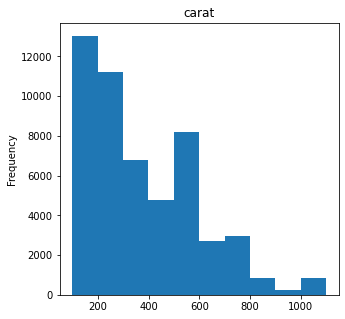

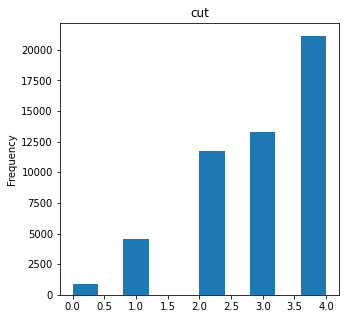

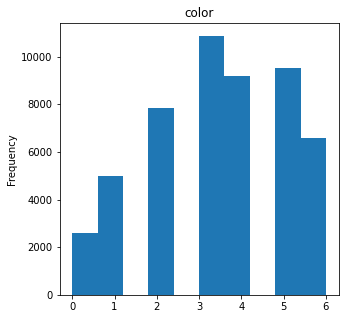

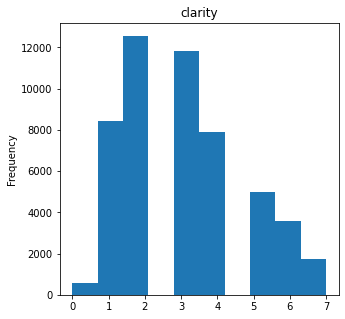

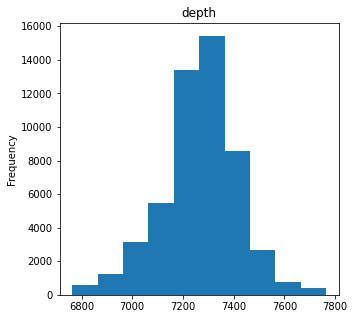

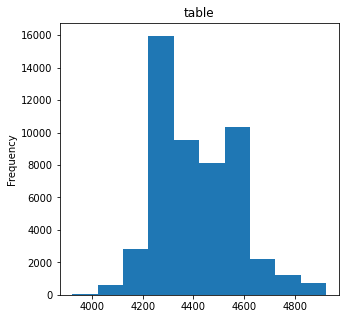

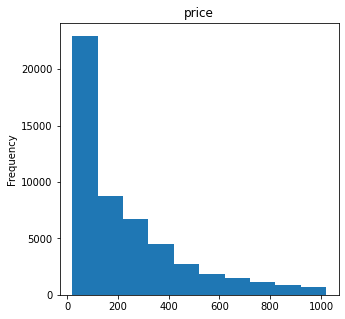

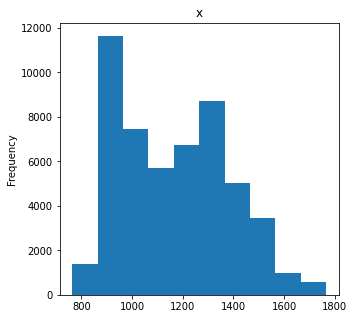

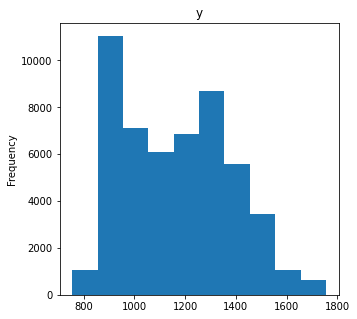

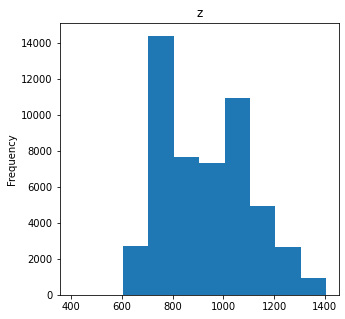

In [55]:
num_col=[]
cat_col=[]
for col in data.columns:
    plt.figure(col, figsize=(5,5))
    plt.title(col)
    if is_numeric_dtype(data[col]):
        data[col].plot(kind="hist")
        num_col.append(col)
    if is_string_dtype(data[col]):
        sns.countplot(x=col, data=data, order=data[col].value_counts().index)
        plt.show()
        cat_col.append(col)

Distribuição de valores de Preços

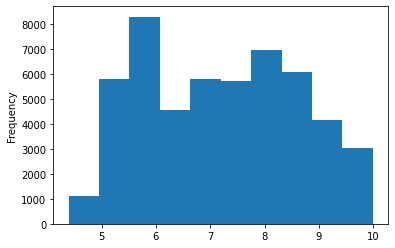

In [56]:
if(LogPrice):
  data["log_price"]=np.log2(data["price"]+1)
  data["log_price"].plot(kind="hist")

### Relação entre o preço e os demais atributos

Durante a analise da relação entre o preço e os demais atributos os mais significativos foram o quilate, e as dimensões x, y e z. Foi realizada uma busca por multicolinearidade, onde caso fosse encontrado um resultado significativo entre duas variáveis utilizar uma para inferir a outra seria de grande valor.

Para se analisar os resultados obtidos foram utilizados o erro quadrado médio, a raiz do erro quadrado médio e o R Square, onde as duas primeiras medidas se baseiam em um somatório de erros e a segunda em uma diferença entre duas curvas.

Como técnica para melhora de resultados foi realizada a operação de Log na base 2 no valor do preço, em todos os dados entrada, de forma geral manipular os dados de teste pode gerar resultados errados, porém, como a função de Log é invertível podemos a qualquer momento obter os dados originais.


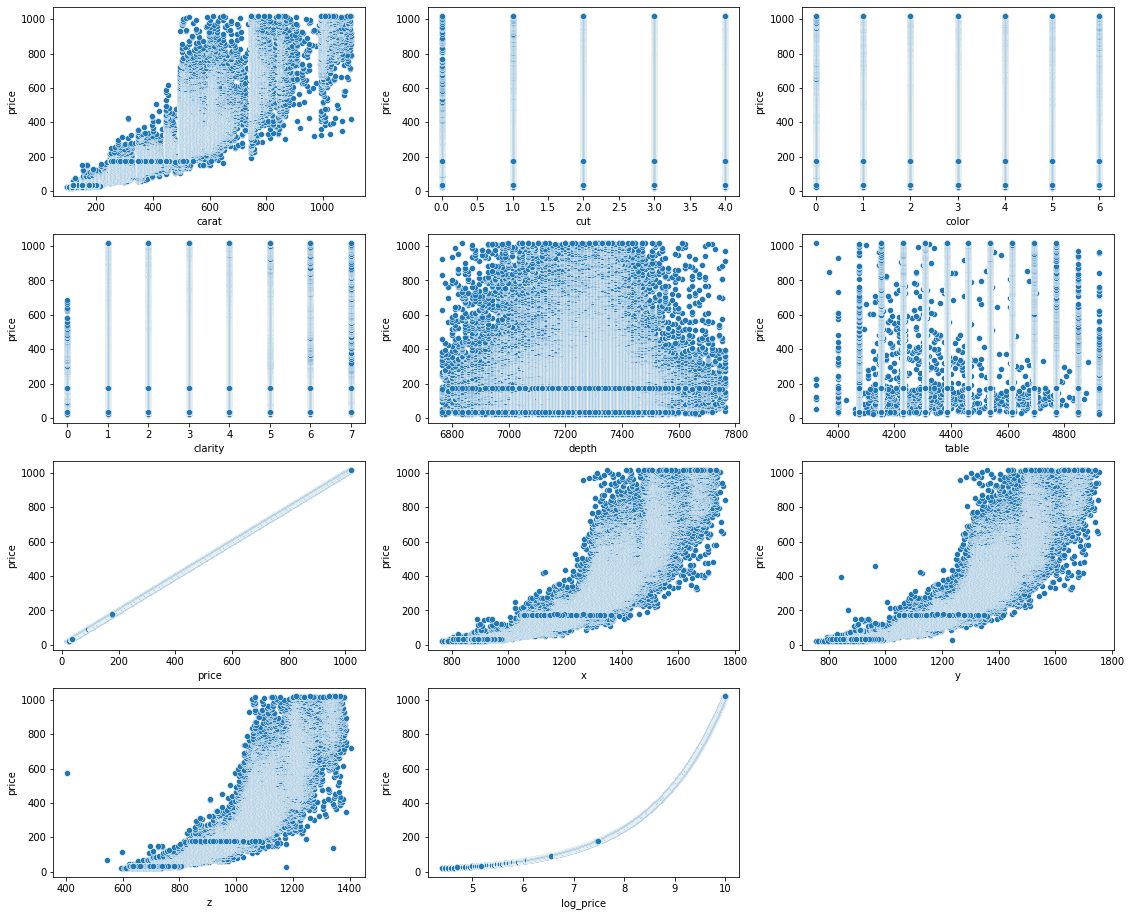

In [57]:
i = 1
plt.figure(figsize=(19, 16))
for c in data.columns:
    plt.subplot(4, 3, i)
    sns.scatterplot(x=data[c], y=data['price'])
    i+=1

### Analise de Correlação

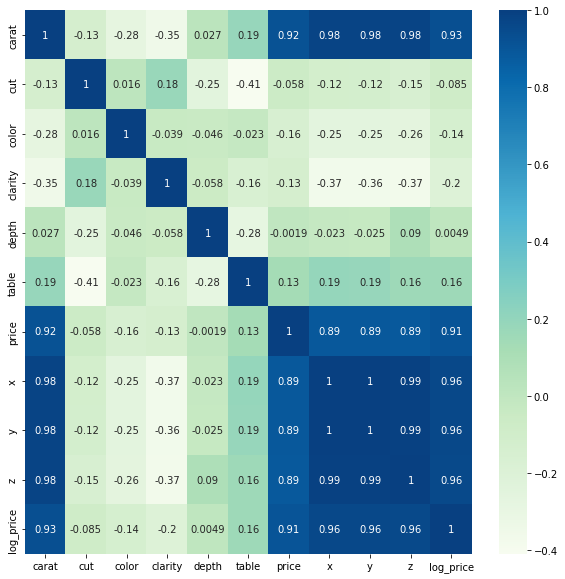

In [58]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, cmap="GnBu")
plt.show()

### Abaixo estão os atributos com mais de 50% de correlação

In [59]:
# Next, Get the variables which has correlation more than 50%
diamond_corr=data.corr()[["price"]]
diamond_corr_hi=diamond_corr.loc[diamond_corr["price"]>0.5]
print(diamond_corr_hi)
if(LogPrice):
  diamond_corr=data.corr()[["log_price"]]
  diamond_corr_hi=diamond_corr.loc[diamond_corr["log_price"]>0.5]

              price
carat      0.922449
price      1.000000
x          0.890451
y          0.891714
z          0.887330
log_price  0.907942


### Buscando por multicolinearidade

In [60]:
X=data[['carat','cut','color','clarity', 'x','y','z', 'table', 'depth']]
#VIF DataFrame

vif_data=pd.DataFrame()
vif_data['features']=X.columns

#calculating VIF for each feature
vif_data["VIF"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data

,features,VIF
0,carat,128.610656
1,cut,11.926322
2,color,5.689119
3,clarity,5.543326
4,x,13615.173569
5,y,11572.010189
6,z,5575.561623
7,table,996.507428
8,depth,1492.813962


# Inicio da Inferencia




# Mean Square Error: Erro para cada conjunto x - x', sendo x o previsto e x' o predito, onde o Mean Square Error = (x - x')**2


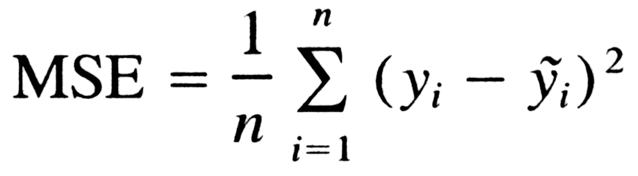

# Root Mean Square Error: np.sqrt(Mean Square Error)

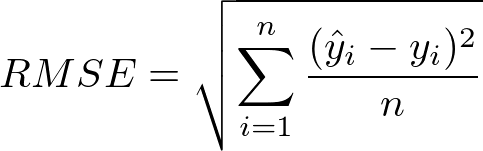


# R Square: Pode ser vista como a distancia entre a "curva" da regressão e os valores reais


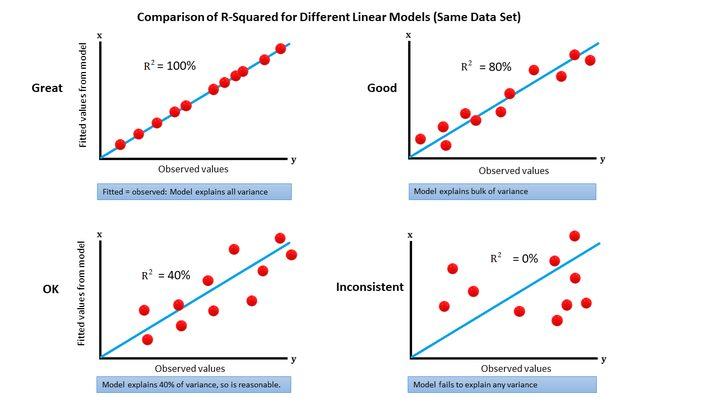

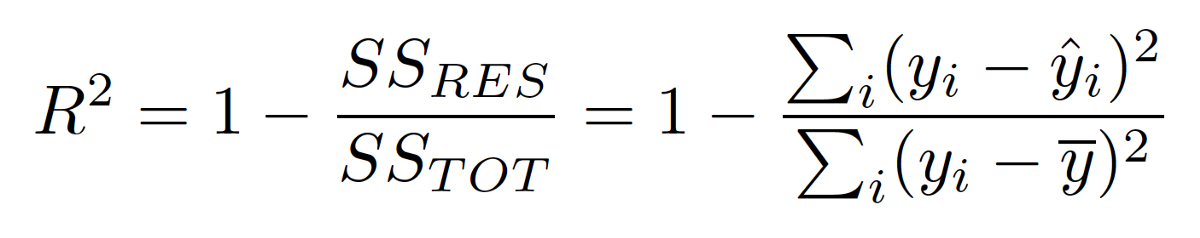

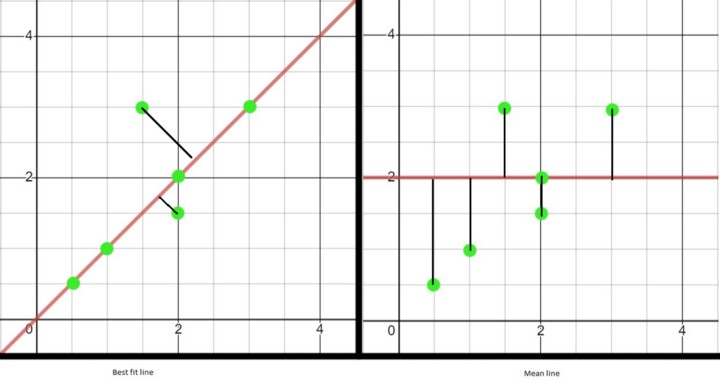

In [61]:
if(LogPrice):
  y=data['log_price'] #Dependent variable
  X=data[['carat','color','clarity', 'cut','x','y','z', 'table', 'depth']] #independent variable

#y=data['price'] #Dependent variable
X=data[['carat','color','clarity', 'cut','x','y','z', 'table', 'depth']] #independent variable

# Next, we devide our dataset into training and testing datasets, in 70 and 30 ratio.
# Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3) 
if(LogApply):
  y_train=np.log2(y_train+1)

## Criando e Treinando o modelo

Foram utilizados 4 modelos, um modelo de regressão linear que atribui para cada atributo um coeficiente e a partir de um conjunto de atributos infere um resultado, o modelo Ridge que realiza uma manobra semelhante a regressão linear, porem somando alguns pesos ao resultado para tentar encontrar uma melhor inferência, o modelo Elasticnet que é um método hibrido entre o método Ridge e o método Lassa, de forma geral um modelo Elasticnet possui um conjunto maior de pesos a serem regulados do que um modelo Ridge e por último temos uma floresta aleatória, que utiliza uma serie de alvores de decisão para  inferir um resultado.

Regressão Linear

In [62]:
lr=LinearRegression(normalize=True) 
lr.fit(X_train, y_train) 

coeffecients = pd.DataFrame(lr.coef_,X_train.columns)
coeffecients.columns = ['Coeffecient']
print("Intercept value is {}".format(lr.intercept_))
coeffecients

Intercept value is -7.79795900381243


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


,Coeffecient
carat,-0.003116
color,0.110951
clarity,0.171981
cut,0.036610
x,0.005130
y,0.002282
z,0.003178
table,0.000193
depth,0.000379


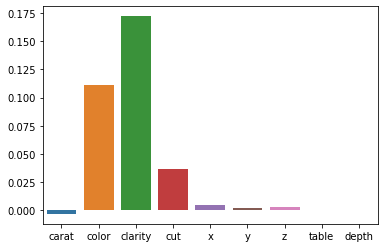

In [63]:
sns.barplot(x=X_train.columns, y=lr.coef_)

In [64]:
pred=lr.predict(X_test)
if(LogApply):
  pred=2**pred-1


 
 

 ========Regressão Linear========

   Mean Square Error: 0.04181960496085693
   Root Mean Square Error: 0.20449842288109935
   R Square: 0.9788713265930395

  



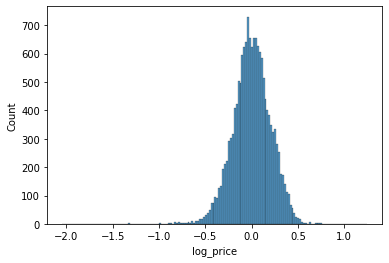

In [65]:
plt.figure()
sns.histplot((y_test-pred))

# MAE, MSE, RMSE & R-square
lr_rsquare=metrics.r2_score(y_test, pred)
#print('Mean Square Error:',metrics.mean_absolute_error(y_test, pred))
print("\n \n ================================================================================ \n ")
print("\n ========Regressão Linear========\n")
print('   Mean Square Error:',metrics.mean_squared_error(y_test, pred))
print('   Root Mean Square Error:',np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('   R Square:', metrics.r2_score(y_test,pred))
print("\n ================================================================================ \n  \n")

### Validação do modelo

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


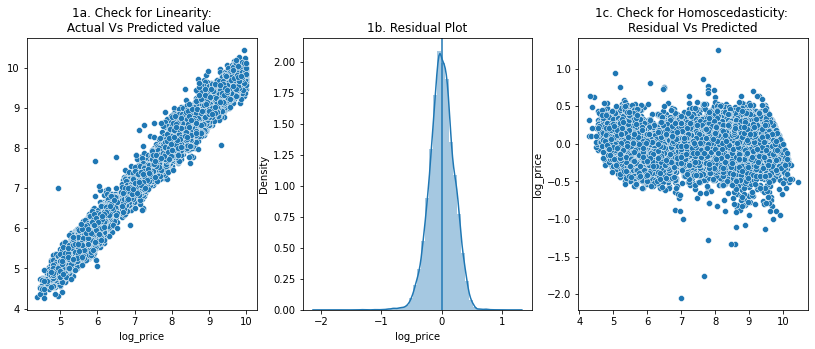

In [66]:
#1. Plot between predicted vs actual values
f=plt.figure(figsize=(14,5))
ax=f.add_subplot(131)
sns.scatterplot(y_test, pred)
#plt.hlines(y=0, xmin= -1000, xmax=5000)
ax.set_title('1a. Check for Linearity:\n Actual Vs Predicted value')


# 2. Check for Residual normality & mean : The residual error plot should be normally distributed
# & The mean of residual error should be 0 or close to 0 as much as possible

ax=f.add_subplot(132)
sns.distplot(y_test-pred)
ax.axvline((y_test-pred).mean())
ax.set_title('1b. Residual Plot')

#3 Homoscedasticity -The data are homoscedastic meaning the residuals are equal across the regression line. 
#We can look at residual Vs fitted value scatter plot. 
#If heteroscedastic plot would exhibit a funnel shape pattern
ax=f.add_subplot(133)
sns.scatterplot(x=pred, y=(y_test-pred))
plt.title('1c. Check for Homoscedasticity: \nResidual Vs Predicted')
plt.show()

### Regressão Ridge

Adiciona um termo de penalização para evitar overfitting

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
 


 
 

 ========Ridge========

   Mean Squared Error: 0.05758130298333312
   Root Mean Squared Error: 0.2399610447204569
   R Squared: 0.970907985710988

  



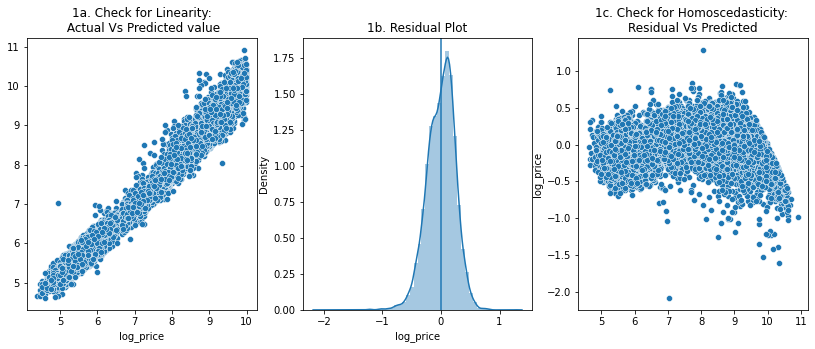

In [67]:
ridgeReg=Ridge(alpha=0.05, normalize=True)
ridgeReg.fit(X_train, y_train)
rid_pred=ridgeReg.predict(X_test)
if(LogApply):
  rid_pred=2**rid_pred-1
rid_rsquare=metrics.r2_score(y_test, rid_pred)

print("\n \n ================================================================================ \n ")
print("\n ========Ridge========\n")
print('   Mean Squared Error:',metrics.mean_squared_error(y_test, rid_pred))
print('   Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, rid_pred)))
print('   R Squared:', metrics.r2_score(y_test,rid_pred))
print("\n ================================================================================ \n  \n")

#plotting

#1. Plot between predicted vs actual values
f=plt.figure(figsize=(14,5))
ax=f.add_subplot(131)
sns.scatterplot(y_test, rid_pred)
ax.set_title('1a. Check for Linearity:\n Actual Vs Predicted value')


# 2. Check for Residual normality & mean : The residual error plot should be normally distributed
# & The mean of residual error should be 0 or close to 0 as much as possible

ax=f.add_subplot(132)
sns.distplot(y_test-rid_pred)
ax.axvline((y_test-rid_pred).mean())
ax.set_title('1b. Residual Plot')

#3 Homoscedasticity -The data are homoscedastic meaning the residuals are equal across the regression line. 
#We can look at residual Vs fitted value scatter plot. 
#If heteroscedastic plot would exhibit a funnel shape pattern
ax=f.add_subplot(133)
sns.scatterplot(x=rid_pred, y=(y_test-rid_pred))
plt.title('1c. Check for Homoscedasticity: \nResidual Vs Predicted')
plt.show()

### Regressão Elasticnet

Adiciona dupla penalização, um metodo hibrido entre o Ridge e o Lasso

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.913e+02, tolerance: 7.151e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passin


 
 

 ========Elasticnet========

   Mean Squared Error: 0.04325550062927306
   Root Mean Squared Error: 0.2079795678168244
   R Squared: 0.978145863723344

  



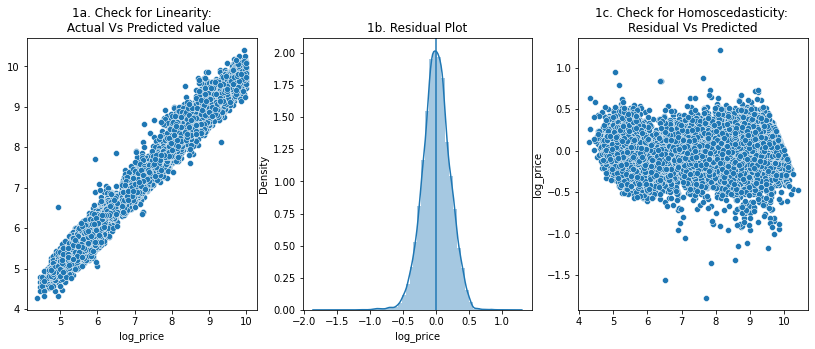

In [68]:
ENReg=ElasticNet(alpha=0.05, l1_ratio=0.5, normalize=False)
ENReg.fit(X_train, y_train)
EN_pred=ENReg.predict(X_test)
if(LogApply):
  EN_pred=2**EN_pred-1
EN_rsquare=metrics.r2_score(y_test, EN_pred)
print("\n \n ================================================================================ \n ")
print("\n ========Elasticnet========\n")
print('   Mean Squared Error:',metrics.mean_squared_error(y_test, EN_pred))
print('   Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, EN_pred)))
print('   R Squared:', metrics.r2_score(y_test,EN_pred))
print("\n ================================================================================ \n  \n")

#Plotting

#1. Plot between predicted vs actual values
f=plt.figure(figsize=(14,5))
ax=f.add_subplot(131)
sns.scatterplot(y_test, EN_pred)
ax.set_title('1a. Check for Linearity:\n Actual Vs Predicted value')


# 2. Check for Residual normality & mean : The residual error plot should be normally distributed
# & The mean of residual error should be 0 or close to 0 as much as possible

ax=f.add_subplot(132)
sns.distplot(y_test-EN_pred)
ax.axvline((y_test-EN_pred).mean())
ax.set_title('1b. Residual Plot')

#3 Homoscedasticity -The data are homoscedastic meaning the residuals are equal across the regression line. 
#We can look at residual Vs fitted value scatter plot. 
#If heteroscedastic plot would exhibit a funnel shape pattern
ax=f.add_subplot(133)
sns.scatterplot(x=EN_pred, y=(y_test-EN_pred))
plt.title('1c. Check for Homoscedasticity: \nResidual Vs Predicted')
plt.show()

### Regressão Floresta Aleatoria 

Utiliza uma serie de arvores de decisão para predizer um resultado


 
 

 ========RandonForest========

   Mean Squared Error:  0.015425689720117146
   Root Mean Squared Error: 0.12420020016134091
   R2 Square:  0.9922064218330487

  



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


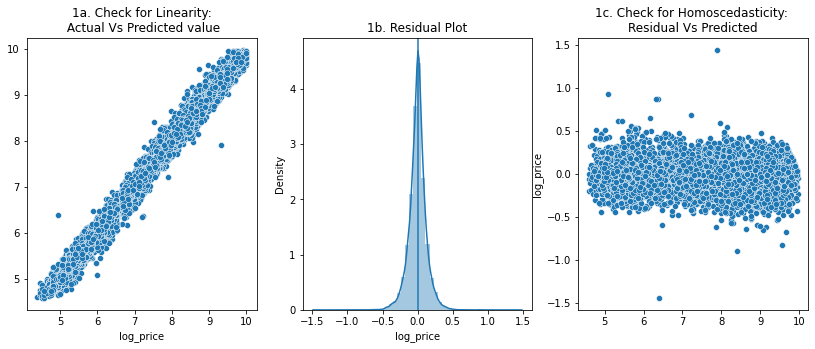

In [69]:
rf_model=RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_y_pred=rf_model.predict(X_test)
if(LogApply):
  rf_y_pred=2**rf_y_pred-1
rf_rsquare=metrics.r2_score(y_test, rf_y_pred)
print("\n \n ================================================================================ \n ")
print("\n ========RandonForest========\n")
print("   Mean Squared Error: ", metrics.mean_squared_error(y_test,rf_y_pred))
print("   Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test,rf_y_pred)))
print("   R2 Square: ", metrics.r2_score(y_test, rf_y_pred))
print("\n ================================================================================ \n  \n")

#1. Plot between predicted vs actual values
f=plt.figure(figsize=(14,5))
ax=f.add_subplot(131)
sns.scatterplot(y_test, rf_y_pred)
ax.set_title('1a. Check for Linearity:\n Actual Vs Predicted value')


# 2. Check for Residual normality & mean : The residual error plot should be normally distributed
# & The mean of residual error should be 0 or close to 0 as much as possible

ax=f.add_subplot(132)
sns.distplot(y_test-rf_y_pred)
ax.axvline((y_test-rf_y_pred).mean())
ax.set_title('1b. Residual Plot')

#3 Homoscedasticity -The data are homoscedastic meaning the residuals are equal across the regression line. 
#We can look at residual Vs fitted value scatter plot. 
#If heteroscedastic plot would exhibit a funnel shape pattern
ax=f.add_subplot(133)
sns.scatterplot(x=rf_y_pred, y=(y_test-rf_y_pred))
plt.title('1c. Check for Homoscedasticity: \nResidual Vs Predicted')
plt.show()

Comparação dos Metodos

In [70]:
print(" ================================================================================  ")
print(" ========Regressão Linear========")
print('   Mean Square Error:',metrics.mean_squared_error(y_test, pred))
print('   Root Mean Square Error:',np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('   R Square:', metrics.r2_score(y_test,pred))
print(" ================================================================================ ")
print(" ========Ridge========")
print('   Mean Squared Error:',metrics.mean_squared_error(y_test, rid_pred))
print('   Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, rid_pred)))
print('   R Squared:', metrics.r2_score(y_test,rid_pred))
print(" ================================================================================  ")
print(" ========Elasticnet========")
print('   Mean Squared Error:',metrics.mean_squared_error(y_test, EN_pred))
print('   Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, EN_pred)))
print('   R Squared:', metrics.r2_score(y_test,EN_pred))
print(" ================================================================================  ")
print(" ========RandonForest========")
print("   Mean Squared Error: ", metrics.mean_squared_error(y_test,rf_y_pred))
print("   Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test,rf_y_pred)))
print("   R2 Square: ", metrics.r2_score(y_test, rf_y_pred))
print(" ================================================================================ ")
pd.DataFrame(({'R-Squared %':[round(lr_rsquare*100),round(rid_rsquare*100),round(EN_rsquare*100), round(rf_rsquare*100)]}), index=['Linear Regression','Ridge Regression','Elastic Net','RandomForest Regression'])

 ========Regressão Linear========
   Mean Square Error: 0.04181960496085693
   Root Mean Square Error: 0.20449842288109935
   R Square: 0.9788713265930395
 ========Ridge========
   Mean Squared Error: 0.05758130298333312
   Root Mean Squared Error: 0.2399610447204569
   R Squared: 0.970907985710988
 ========Elasticnet========
   Mean Squared Error: 0.04325550062927306
   Root Mean Squared Error: 0.2079795678168244
   R Squared: 0.978145863723344
 ========RandonForest========
   Mean Squared Error:  0.015425689720117146
   Root Mean Squared Error: 0.12420020016134091
   R2 Square:  0.9922064218330487


,R-Squared %
Linear Regression,98
Ridge Regression,97
Elastic Net,98
RandomForest Regression,99


In [71]:
pd.DataFrame(({'R-Squared %':[round(lr_rsquare*100),round(rid_rsquare*100),round(EN_rsquare*100), round(rf_rsquare*100)]}), index=['Linear Regression','Ridge Regression','Elastic Net','RandomForest Regression'])

,R-Squared %
Linear Regression,98
Ridge Regression,97
Elastic Net,98
RandomForest Regression,99


# Resultados:

## Apenas remoção de Outliers
### Avaliando os atributos 'carat','color','clarity', 'cut','x','y','z', 'table', 'depth'


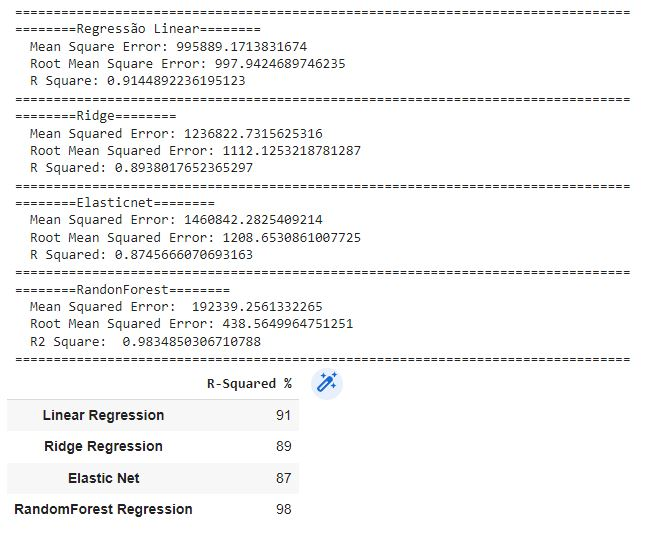

### Avaliando os atributos 'carat','x','y','z'

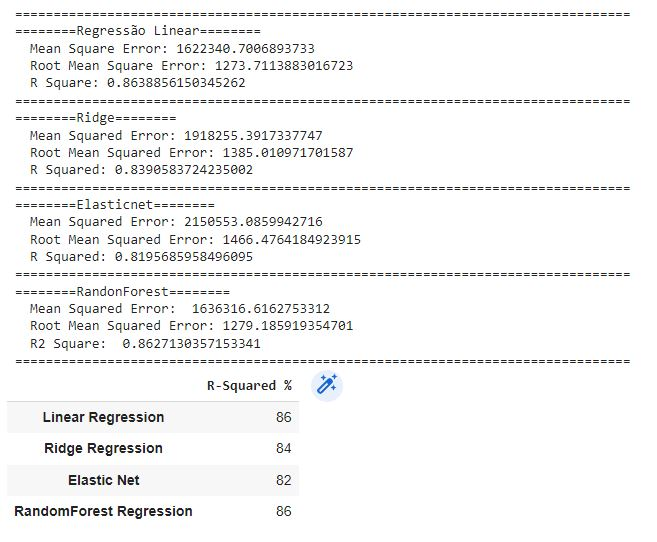

### Melhor resultado + Discretização

### 1000 bins

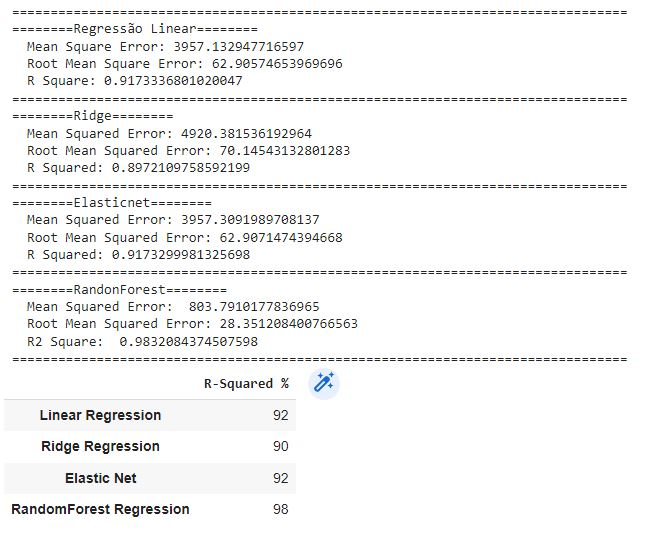

### 100 bins

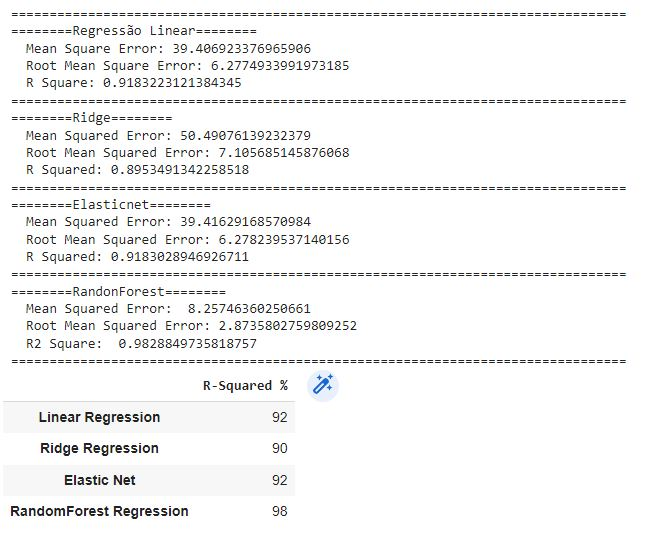

### Melhor resultado + Normalização 

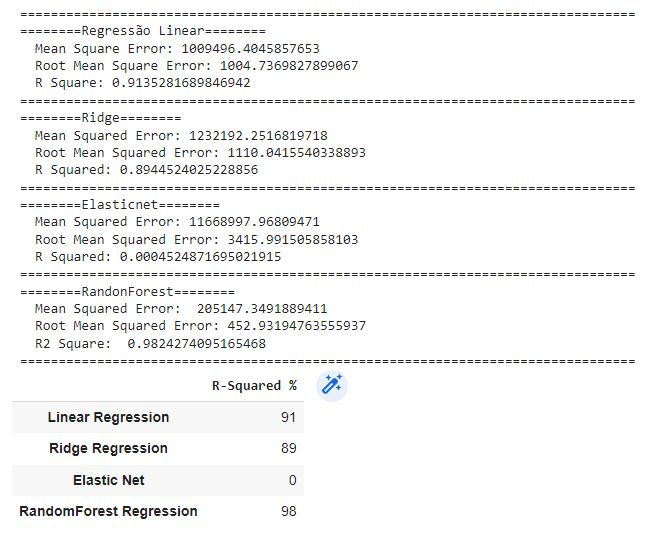

### Melhor resultado + Log do Preço

Com normalização

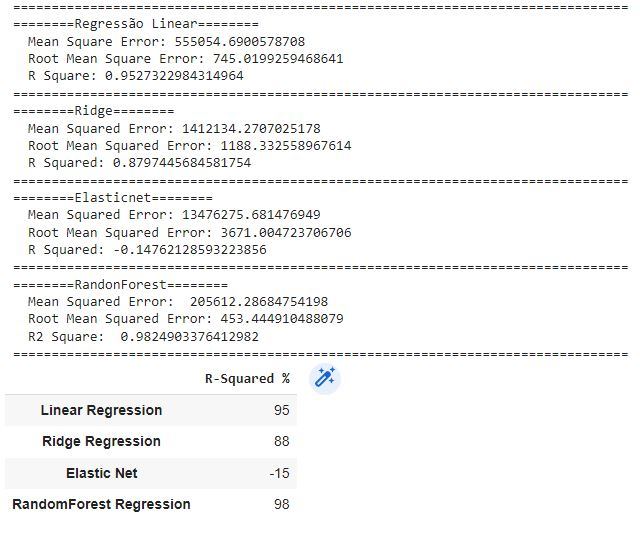

Sem normalização

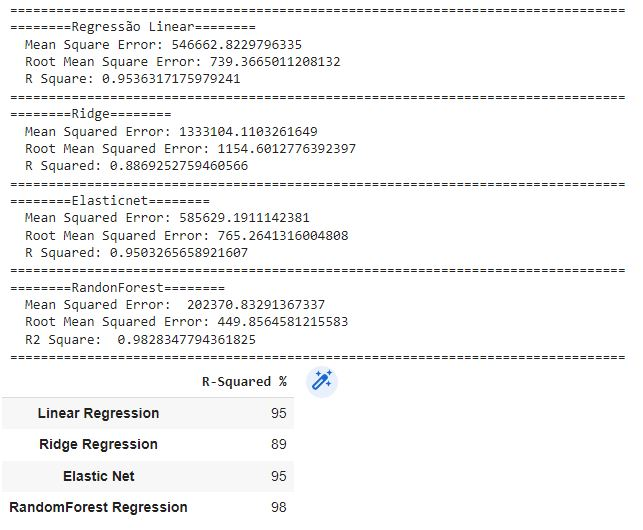

## Melhor Resultado + Log do Preço em ambas bases

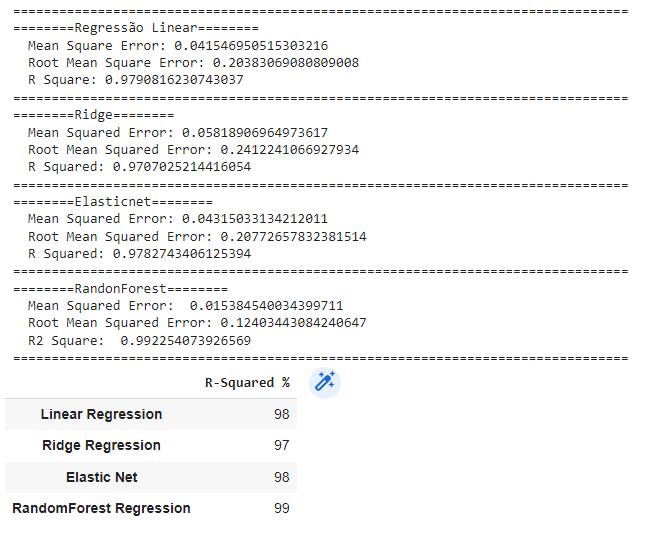

Por meio de uma sequencia de testes que estão apresentados anteriormente, foram encontradas as melhores operações a serem realizadas para ganhar eficiência dos modelos, sendo tal sequência, a remoção dos Outliers e utilização de todos os atributos na inferência, a discretização, a normalização piorou os resultados, a aplicação de Log no preço dos dados de treino e aplicação da exponencial nos dados previstos, se obtendo o melhor resultado sem se manipular os dados de teste, e aplicando Log nos dados de teste também chegamos ao melhor resultado obtido.

# Conclusão

Foi possível por meio das diversas técnicas aplicadas se encontrar alguns modelos com mais de 95% de acurácia, sendo assim viável se utilizar um sistema automatizado para prever o valor de um diamante de se tendo como entradas as características físicas da pedra, por meio de modelos de baixo custo computacional. 

Referências Bibliográficas

Diamond Prices Prediction with 99% accuracy
https://www.kaggle.com/code/sonika82/diamond-prices-prediction-with-99-accuracy

Random Forest Diamond Price Prediction
https://www.kaggle.com/code/abdu0ch/random-forest-diamond-price-prediction

DiramondPrices_RegressionModels
https://www.kaggle.com/code/mahyararani/diramondprices-regressionmodels/notebook